In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=UserWarning)
df = pd.read_csv('survey lung cancer.csv')
display(df.head())
df.info()
print(df['LUNG_CANCER'].value_counts())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## We mapped Male and Female to Binary digits for ease of use. Gender 1 = Male , Gender 0 = Female.

---

## The dataset is very skewed towards positive lung cancer cases, so we randomly removed positive lung cancer cases to even out the distribution.

In [ ]:
num_to_remove = 230

#Identify the indices of the '1' values
rows_with_one = df[df['LUNG_CANCER'] == 1].index
indices_to_drop = np.random.choice(rows_with_one, size=num_to_remove, replace=False)

# Drop the selected rows
df = df.drop(indices_to_drop)

# Display the modified DataFrame
print(df)
print(df['LUNG_CANCER'].value_counts())

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
2         0   59        0               0        0              1   
3         1   63        1               1        1              0   
4         0   63        0               1        0              0   
8         0   68        1               0        1              0   
12        0   60        1               0        0              0   
..      ...  ...      ...             ...      ...            ...   
282       1   46        0               1        1              0   
286       0   63        0               0        0              0   
300       0   63        1               1        1              1   
306       1   58        1               0        0              0   
307       1   67        1               0        1              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
2                  0         1         0         1                  0   
3                  0     

## Analysis of dataset

<ipython-input-27-6c3a5def8453>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AGE', data=df, palette='pastel')  # Plot countplot for age column


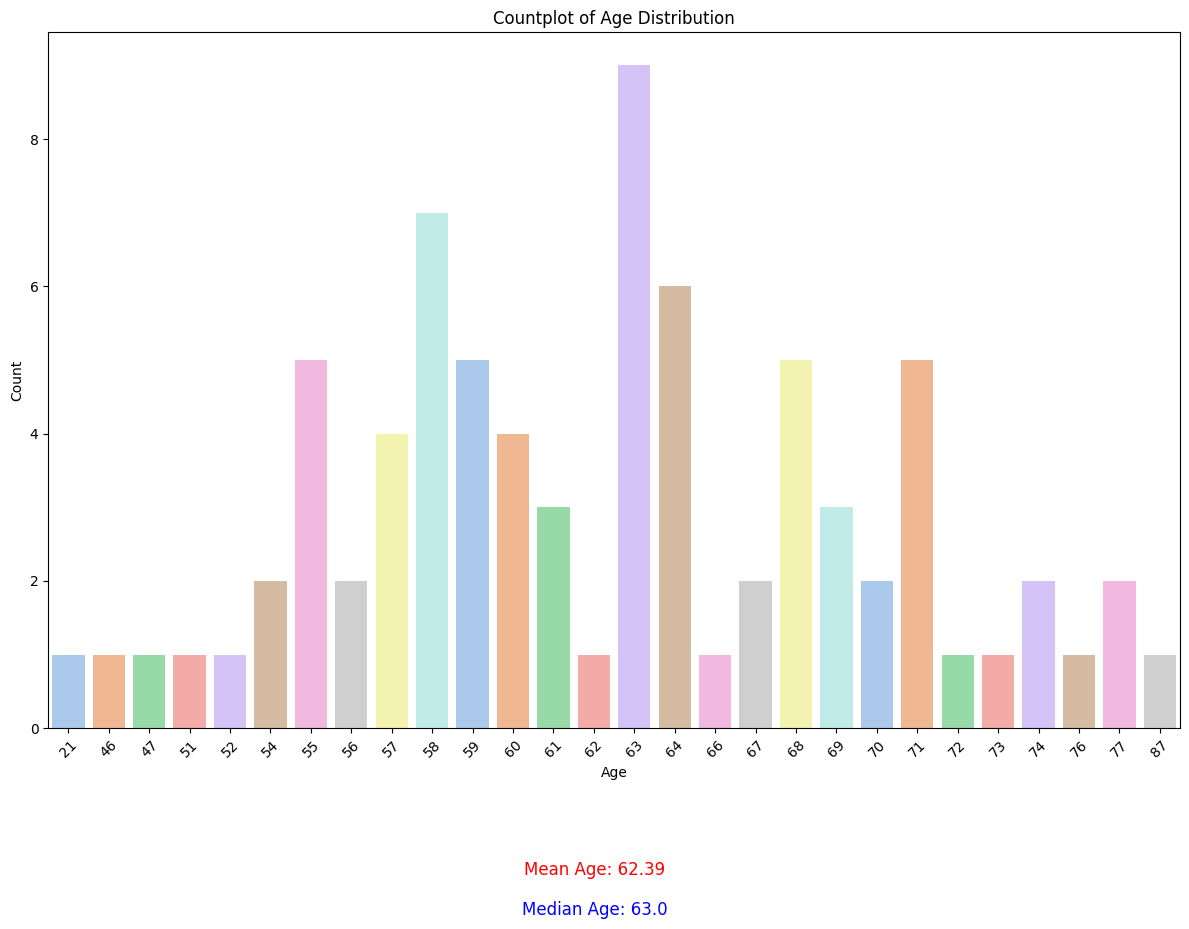

In [ ]:
# Plotting seaborn countplot for age distribution
plt.figure(figsize=(12, 8))  # Set the figure size

sns.countplot(x='AGE', data=df, palette='pastel')  # Plot countplot for age column
plt.title('Countplot of Age Distribution')  # Set the title
plt.xlabel('Age')  # Set label for x-axis
plt.ylabel('Count')  # Set label for y-axis

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Calculate mean and median
mean_age = df['AGE'].mean()
median_age = df['AGE'].median()

# Display mean and median as text below the plot
plt.figtext(0.5, -0.1, f'Mean Age: {mean_age:.2f}', ha='center', fontsize=12, color='red')
plt.figtext(0.5, -0.15, f'Median Age: {median_age}', ha='center', fontsize=12, color='blue')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

## Correlation Values and Heatmap

In [ ]:
df_variables = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN' ]

correlations = {}
for variables in df_variables:
    correlation = df['LUNG_CANCER'].corr(df[variables])
    correlations[variables] = correlation
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation'])

print("Correlations of Lung Cancer with different factors")
print()
print(correlations_df)

Correlations of Lung Cancer with different factors

                 Variable  Correlation
0                  GENDER     0.189467
1                     AGE     0.189506
2                 SMOKING     0.087990
3          YELLOW_FINGERS     0.193537
4                 ANXIETY     0.121676
5           PEER_PRESSURE     0.177709
6         CHRONIC DISEASE     0.216442
7                FATIGUE      0.243506
8                ALLERGY      0.556882
9                WHEEZING     0.494548
10      ALCOHOL CONSUMING     0.500347
11               COUGHING     0.468590
12    SHORTNESS OF BREATH     0.036391
13  SWALLOWING DIFFICULTY     0.377006
14             CHEST PAIN     0.317920


,ColumnName,CorrelationValue
0,GENDER,0.144693
1,AGE,0.208003
2,SMOKING,0.577812
3,YELLOW_FINGERS,0.135452
4,ANXIETY,0.396413
5,PEER_PRESSURE,0.179503
6,CHRONIC DISEASE,0.089452
7,FATIGUE,0.053126
8,ALLERGY,0.000002
9,WHEEZING,0.000030


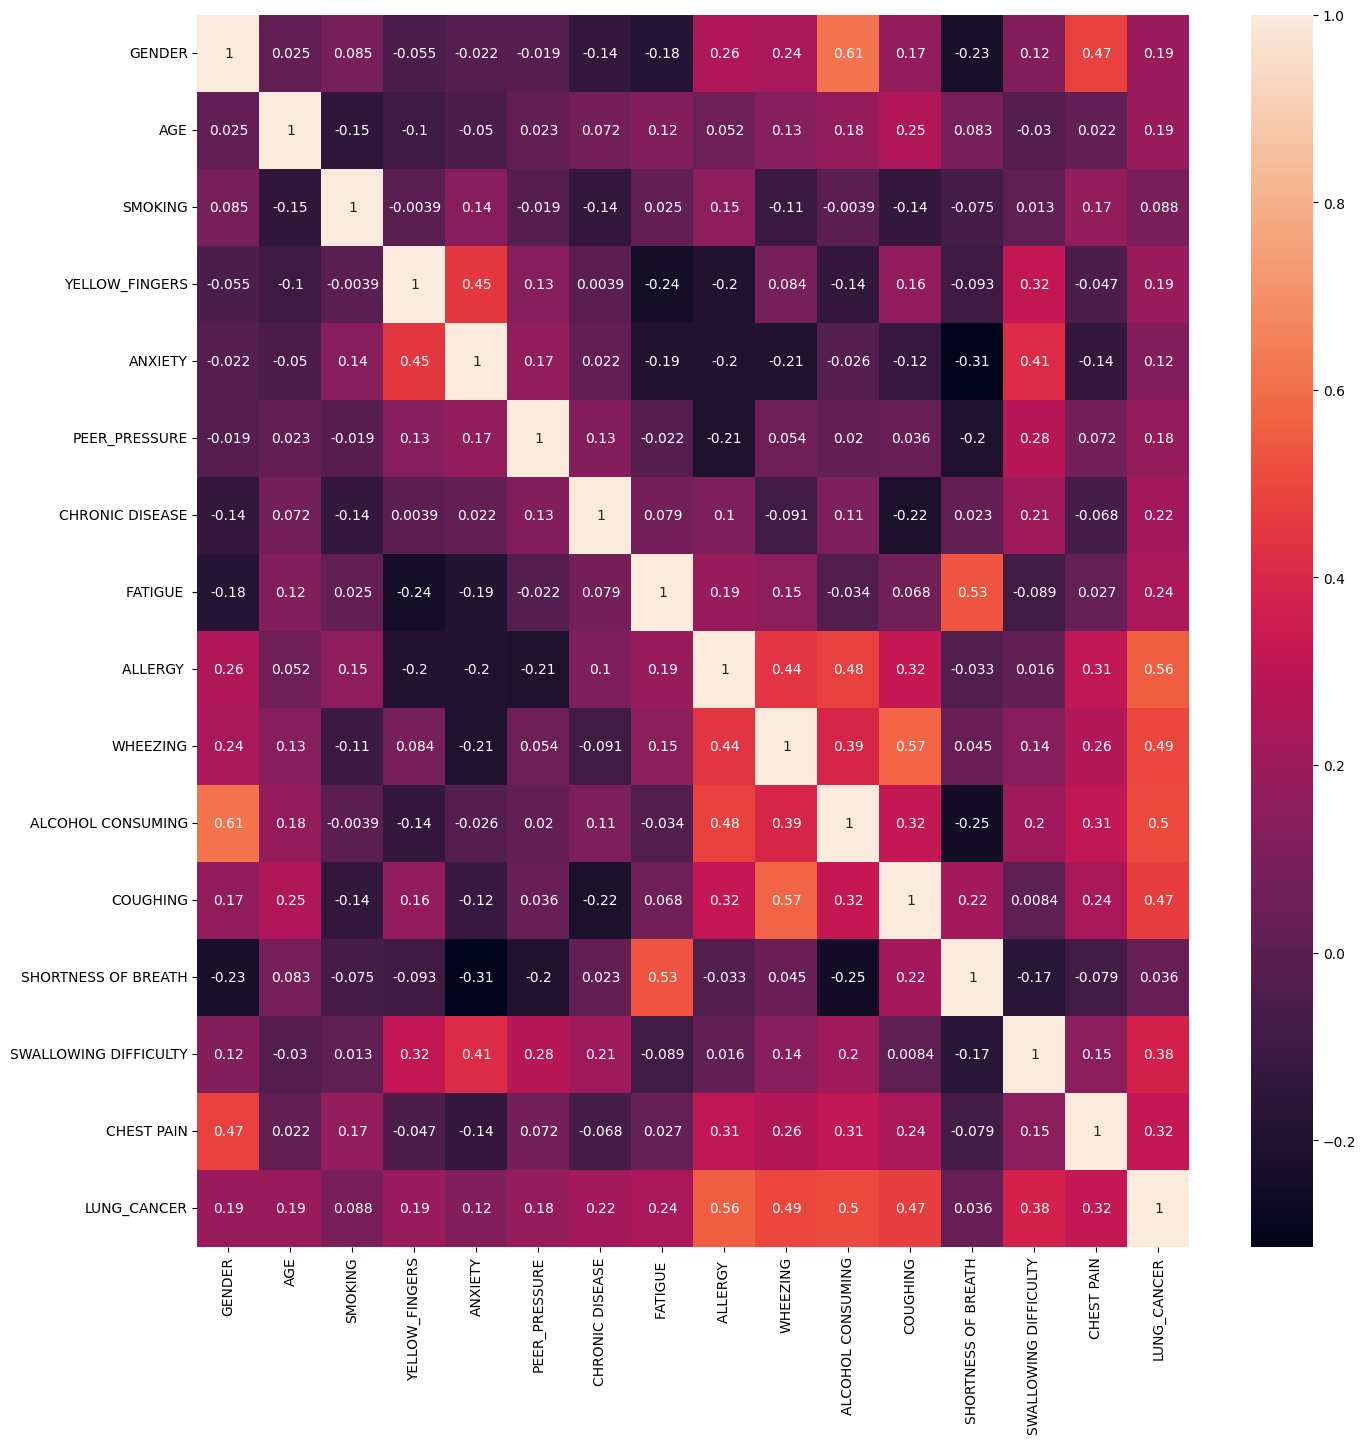

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(), annot=True)

result = []
for i in df.columns:
        if i not in ["LUNG_CANCER"]:
            result.append([i, list(ss.chi2_contingency(pd.crosstab(df[i], df["LUNG_CANCER"])))[1]]) #removed df[j] from after df[i],

resultdf = pd.DataFrame(result, columns=['ColumnName', 'CorrelationValue'])
resultdf

GENDER / LUNG_CANCER
0 0 22
0 1 15
1 0 17
1 1 25

SMOKING / LUNG_CANCER
0 0 20
0 1 17
1 0 19
1 1 23

YELLOW_FINGERS / LUNG_CANCER
0 0 26
0 1 19
1 0 13
1 1 21

ANXIETY / LUNG_CANCER
0 0 27
0 1 23
1 0 12
1 1 17

PEER_PRESSURE / LUNG_CANCER
0 0 29
0 1 23
1 0 10
1 1 17

CHRONIC DISEASE / LUNG_CANCER
0 0 25
0 1 17
1 0 14
1 1 23

FATIGUE  / LUNG_CANCER
0 0 20
0 1 11
1 0 19
1 1 29

ALLERGY  / LUNG_CANCER
0 0 34
0 1 13
1 0 5
1 1 27

WHEEZING / LUNG_CANCER
0 0 30
0 1 11
1 0 9
1 1 29

ALCOHOL CONSUMING / LUNG_CANCER
0 0 32
0 1 13
1 0 7
1 1 27

COUGHING / LUNG_CANCER
0 0 29
0 1 11
1 0 10
1 1 29

SHORTNESS OF BREATH / LUNG_CANCER
0 0 17
0 1 16
1 0 22
1 1 24

SWALLOWING DIFFICULTY / LUNG_CANCER
0 0 34
0 1 21
1 0 5
1 1 19

CHEST PAIN / LUNG_CANCER
0 0 27
0 1 15
1 0 12
1 1 25



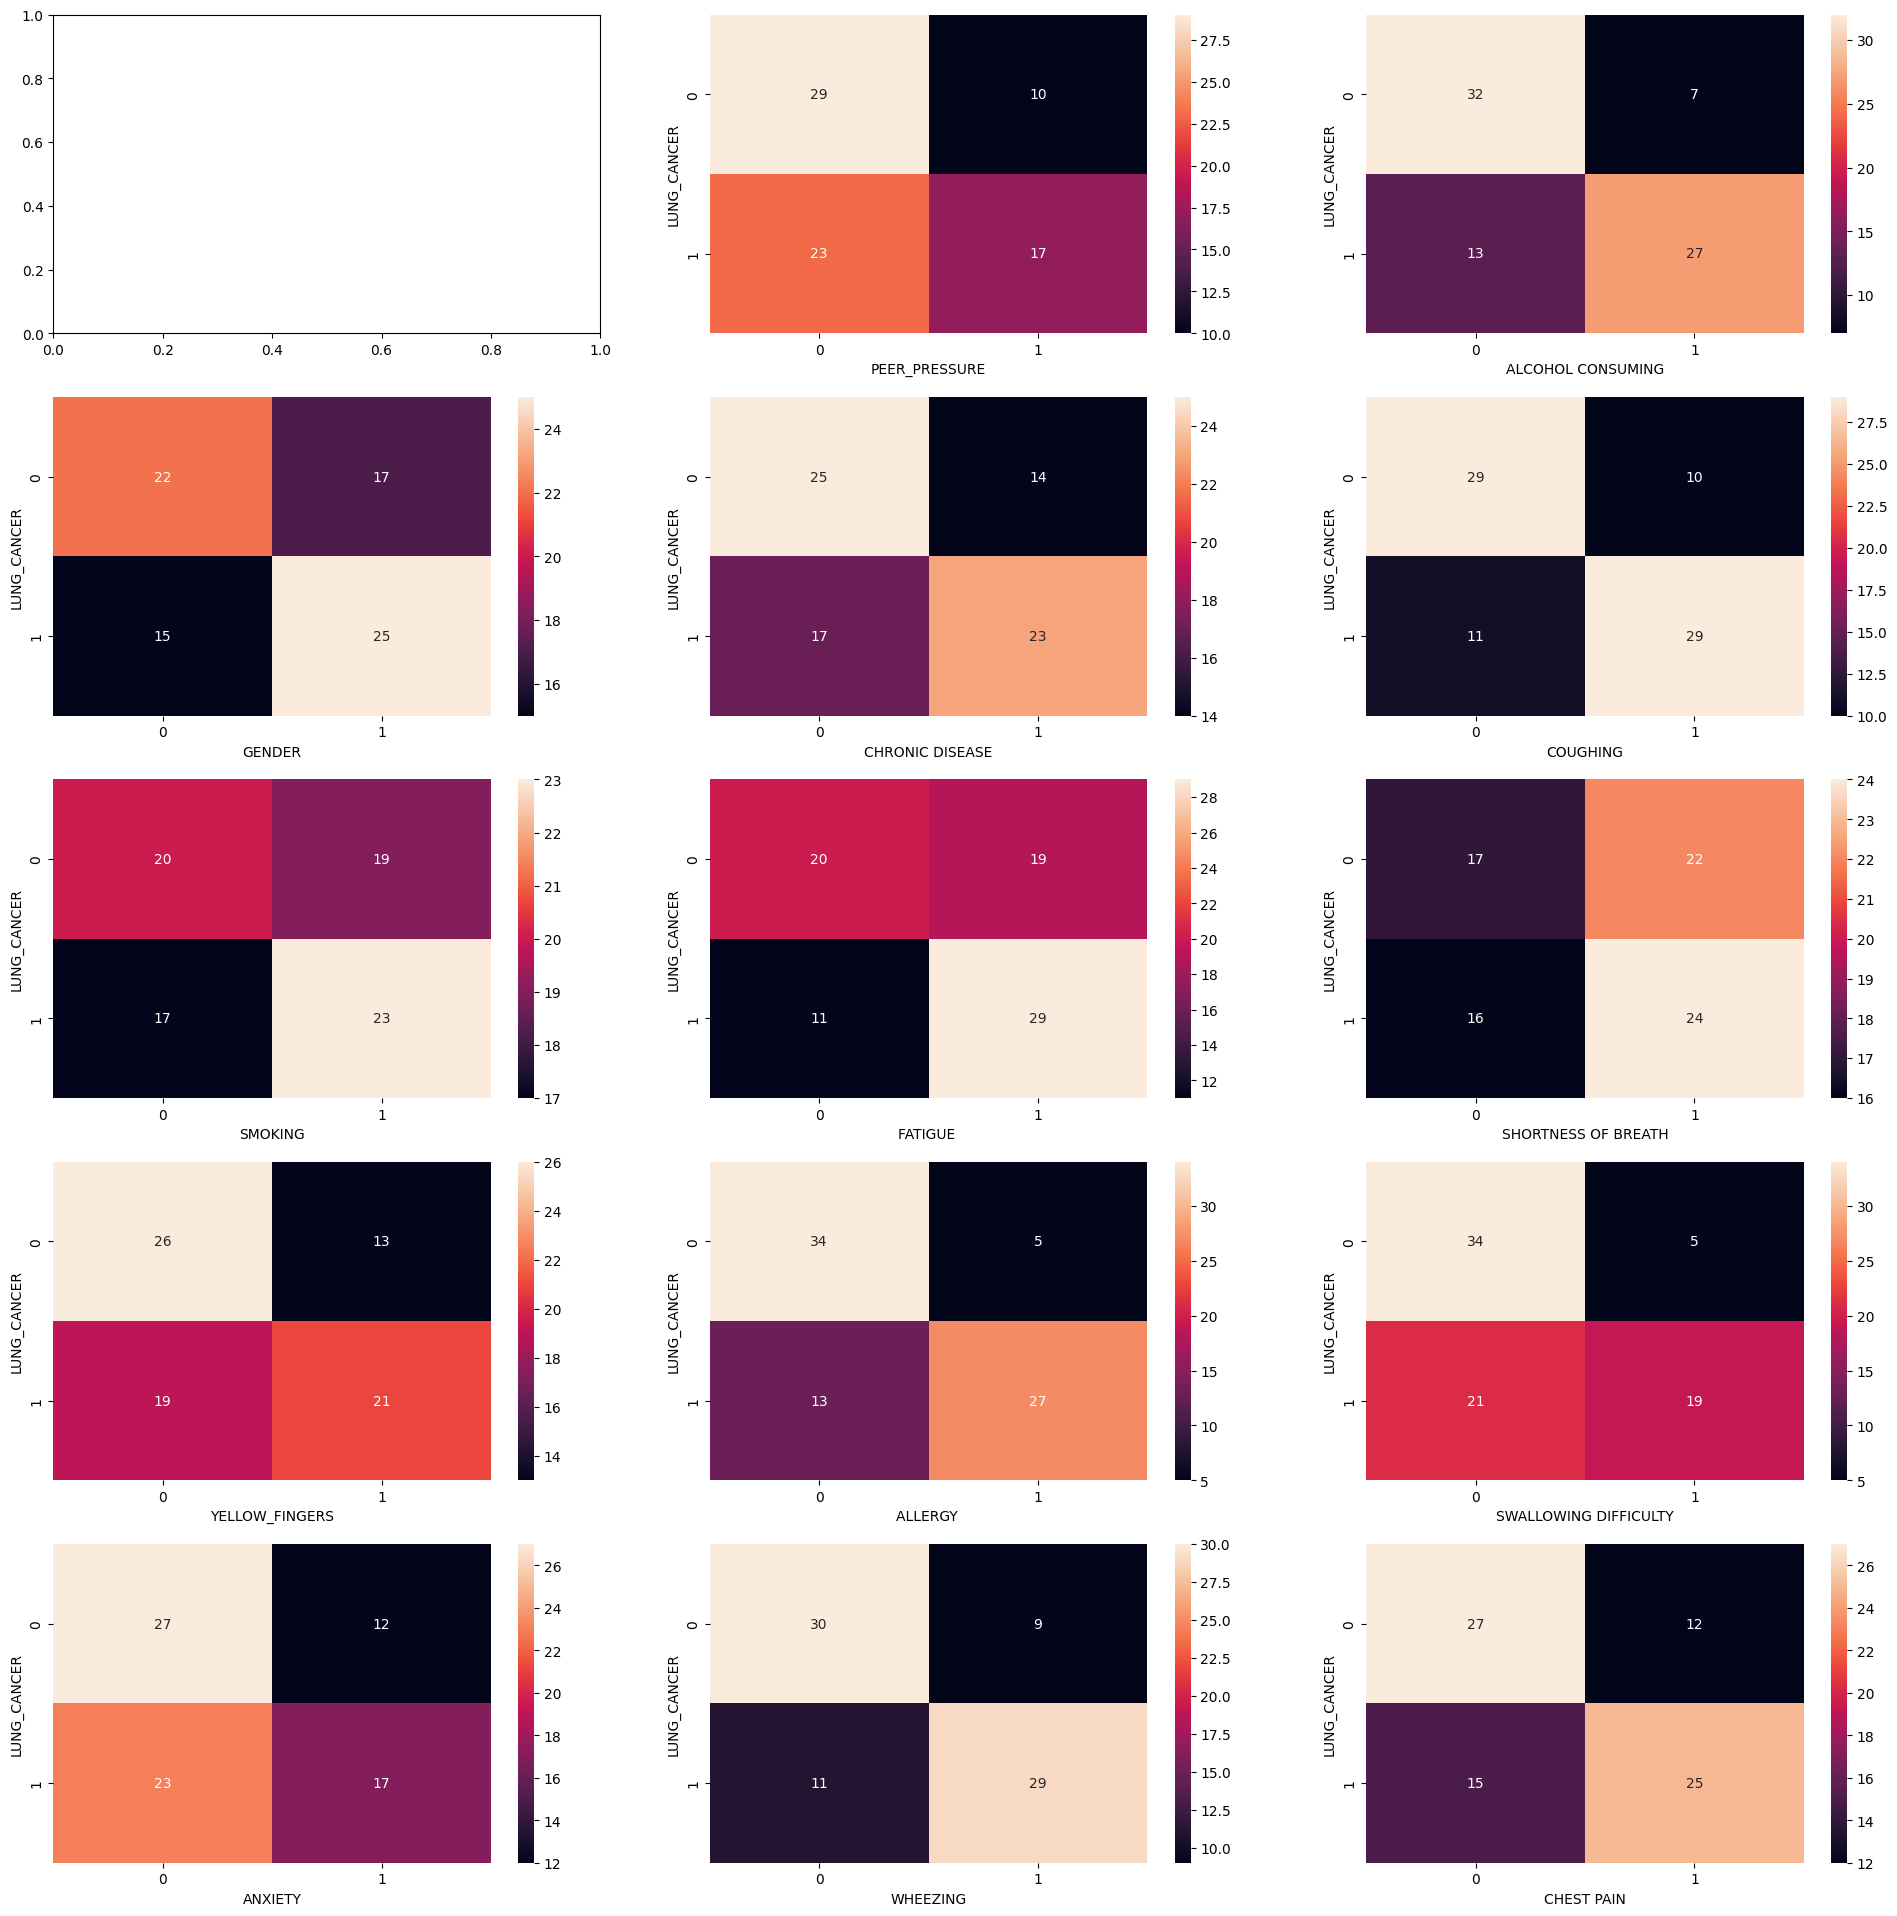

In [ ]:
f, axes = plt.subplots(5, 3, figsize=(24, 24))

j = 0
for i in df.columns:
  if i not in ["LUNG_CANCER", "AGE"]:
    j += 1
    print(i, '/', 'LUNG_CANCER')
    a = sum((df[i] == 0) & (df['LUNG_CANCER'] == 0))
    b = sum((df[i] == 0) & (df['LUNG_CANCER'] == 1))
    c = sum((df[i] == 1) & (df['LUNG_CANCER'] == 0))
    d = sum((df[i] == 1) & (df['LUNG_CANCER'] == 1))
    print('0', '0', a)
    print('0', '1', b)
    print('1', '0', c)
    print('1', '1', d)
    print()
    ax = sns.heatmap(data=pd.DataFrame({'0': [a, b], '1': [c, d]}), annot=True, ax = axes[j%5, j//5], fmt="d")
    ax.set(xlabel=i, ylabel='LUNG_CANCER')




## Machine Learning Model Preparation

In [ ]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVM Model
Support Vector Machine (SVM) is a binary classification algorithm that can be used for predicting lung cancer based on features from our dataset. SVM learns to separate data points into lung cancer (positive) and non-lung cancer (negative) classes by finding an optimal hyperplane in a high-dimensional space. The image shows an example of how SVM tries to find an optimal hyperplane to classify 2 datapoints.

We used a Support Vector Model using a linear kernel, which was better suited to our dataset, as all our input features has high dimensionality, which means each datapoint has a lot of attributes. (15 attributes each datapoint for our case)

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42, probability = True)

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

Accuracy: 0.8125
True Positive Rate:  80.0
False Positive Rate:  16.666666666666664
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.71      0.83      0.77         6

    accuracy                           0.81        16
   macro avg       0.80      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16



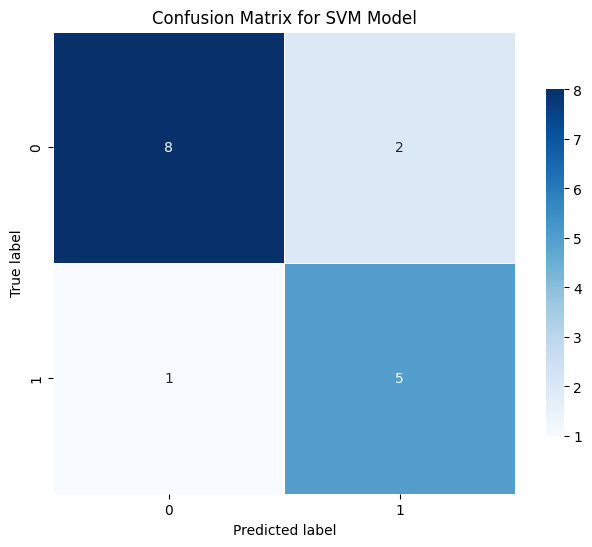

In [ ]:
# Make predictions
predictions = svm_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[0][1])
fp = cm[1][0] / (cm[1][0] + cm[1][1])
print("True Positive Rate: ",tp*100)
print("False Positive Rate: ",fp*100)
print(classification_report(y_test, predictions))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .75})

# Adding labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for SVM Model')

# Show the plot
plt.show()


## Logistic Regression Model
Logistic Regression is a statistical method used for binary classification which can be used for predicting lung cancer risk. Each factor from the dataset contributes to a linear combination that is passed through a sigmoid function, producing a probability between 0 and 1. Similar to SVM, a threshold is applied to classify instances as positive (lung cancer) or negative (non-lung cancer).

Accuracy: 0.8125
True Positive Rate:  80.0
False Positive Rate:  16.666666666666664
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.71      0.83      0.77         6

    accuracy                           0.81        16
   macro avg       0.80      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16



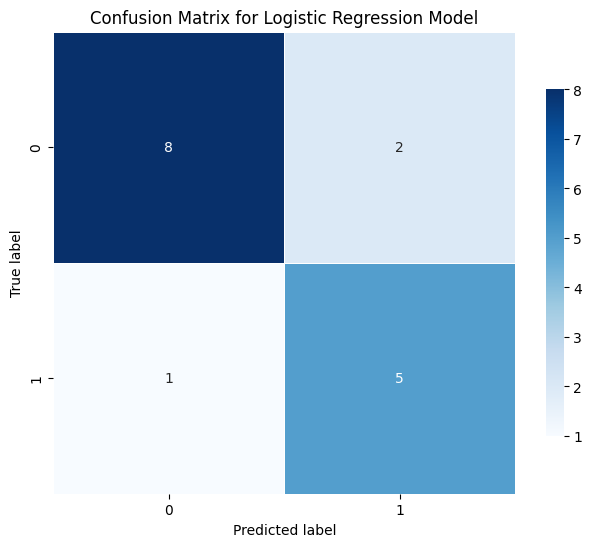

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[0][1])
fp = cm[1][0] / (cm[1][0] + cm[1][1])
print("True Positive Rate: ",tp*100)
print("False Positive Rate: ",fp*100)
print(classification_report(y_test, predictions))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .75})

# Adding labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression Model')

# Show the plot
plt.show()

## Decision Tree Classifier
A Decision Tree Classifier is a machine learning algorithm that builds a tree structure by recursively splitting data based on factor values from the dataset, aiming to maximize information gain or Gini impurity reduction at each node. Each leaf node represents a class label (lung cancer or non-lung cancer).

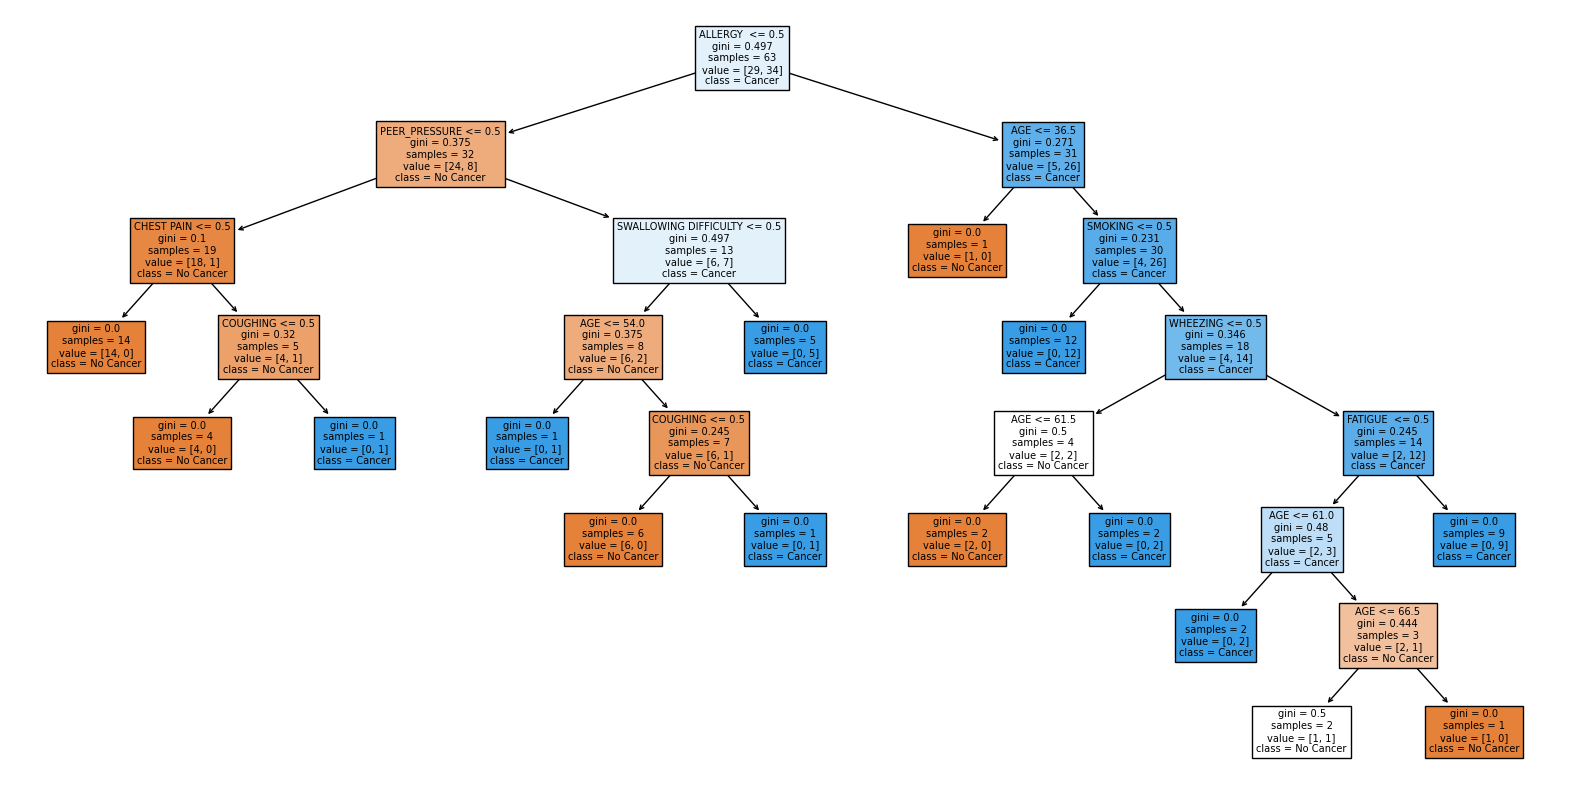

Accuracy: 0.75
True Positive Rate:  70.0
False Positive Rate:  16.666666666666664
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.62      0.83      0.71         6

    accuracy                           0.75        16
   macro avg       0.75      0.77      0.75        16
weighted avg       0.78      0.75      0.75        16



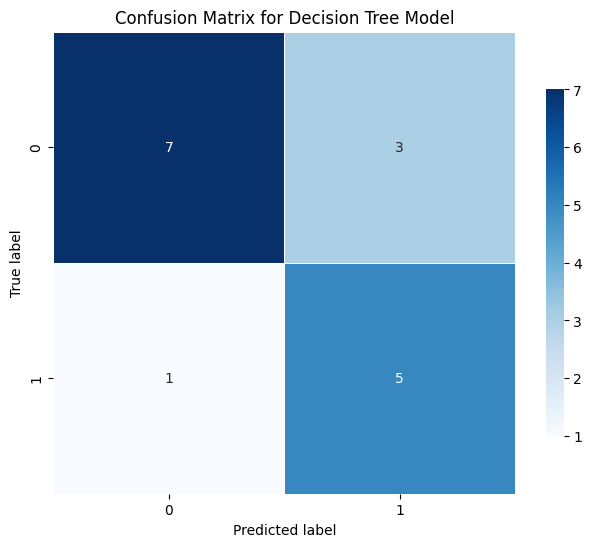

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Visualize the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Cancer', 'Cancer'])
plt.show()

# Predictions and Evaluation
predictions = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[0][1])
fp = cm[1][0] / (cm[1][0] + cm[1][1])
print("True Positive Rate: ",tp*100)
print("False Positive Rate: ",fp*100)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .75})

# Adding labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Decision Tree Model')

# Show the plot
plt.show()


## Random Forest Classifier
A Random Forest Classifier is a collection of decision trees, where each tree is built using a subset of factors and bootstrapped samples of the data. During prediction, each tree independently classifies instances, and the final prediction is determined by a majority vote of all trees. Random forests reduce overfitting and increase robustness compared to individual decision trees.

Accuracy: 0.8125
True Positive Rate:  80.0
False Positive Rate:  16.666666666666664
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.71      0.83      0.77         6

    accuracy                           0.81        16
   macro avg       0.80      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16



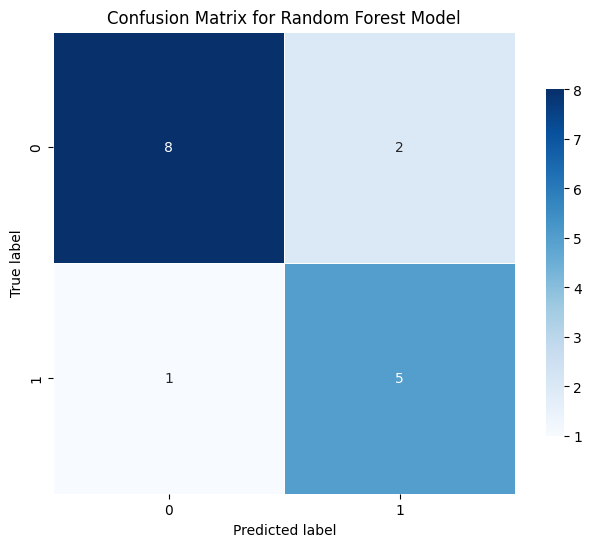

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
predictions = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[0][1])
fp = cm[1][0] / (cm[1][0] + cm[1][1])
print("True Positive Rate: ",tp*100)
print("False Positive Rate: ",fp*100)
print(classification_report(y_test, predictions))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .75})

# Adding labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Random Forest Model')

# Show the plot
plt.show()

## Neural Network

Finally, we created a Neural Network Model. We used Keras, a neural network API based on TensorFlow to build a predictive model. Sequential and Dense are libraries imported from Keras.
Sequential helps us initialize a linear stack of layers, allowing us to create the model by adding layers of ‘neurons’.

Dense adds fully connected layers. The first Dense layer has 32 nodes. It’s specified as the input layer with the input_dim parameter set to the number of features from the training data.This is the entry point of the network. Each node in this layer represents one feature of the input data.

Each input is multiplied by a weight (a parameter that is learned during training) and added together with other weighted inputs and a bias term at each neuron in the next layer.

The second Dense layer is a hidden layer with 16 nodes. These are intermediate layers between input and output layers, consisting of units that transform the input into something that the output layer can use. They are typically what makes the network "deep", and complex features are learned here. The input is passed through an activation function at each neuron. The activation function's role is to introduce non-linearities into the network, which allows the network to learn more complex patterns. We used ReLU (Rectified Linear Unit) as our activation function.

The final Dense layer is the output layer with a single node and uses the sigmoid activation function, similar to the logistic regression model, which outputs a value between 0 and 1, serving as a probability.

epochs=50: The model will work through the entire dataset 50 times, allowing the learning algorithm to refine the weights to better predict the labels.
batch_size=10: The model will update the weights after every 10 samples.

In [ ]:
nn_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=10)
# Evaluate the model
nn_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 0.6509 - accuracy: 0.6667
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7302
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.7778
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8254
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.8571
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.8571
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.9048
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.9206
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.9365
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.9365
Epoch 11/50
7/7 [======================

[0.37866419553756714, 0.8125]

In [ ]:
print("Please enter the following details:") #Get the Input Data from a User
gender = int(input("Gender? (1 for Male, 0 for Female): "))
age = int(input("Age: "))
smoking = int(input("Smoking? (1 for Yes, 0 for No): "))
yellow_fingers = int(input("Yellow Fingers? (1 for Yes, 0 for No): "))
anxiety = int(input("Anxiety? (1 for Yes, 0 for No): "))
peer_pressure = int(input("Peer Pressure? (1 for Yes, 0 for No): "))
chronic_disease = int(input("Chronic Disease? (1 for Yes, 0 for No): "))
fatigue = int(input("Fatigue? (1 for Yes, 0 for No): "))
allergy = int(input("Allergy? (1 for Yes, 0 for No): "))
wheezing = int(input("Wheezing? (1 for Yes, 0 for No): "))
alcohol_consuming = int(input("Alcohol Consuming? (1 for Yes, 0 for No): "))
coughing = int(input("Coughing? (1 for Yes, 0 for No): "))
short_breath = int(input("Shortness of breath? (1 for Yes, 0 for No): "))
swallowing_difficulty = int(input("Swallowing Difficulty? (1 for Yes, 0 for No): "))
chest_pain = int(input("Chest Pain? (1 for Yes, 0 for No): "))

# Create a DataFrame for the input features
input_features = pd.DataFrame([[
gender, age, smoking, yellow_fingers, anxiety, peer_pressure,
chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, short_breath,
swallowing_difficulty, chest_pain
]], columns=X_train.columns)

# Scale the features
input_features_scaled = scaler.transform(input_features)

# Make a prediction
prediction = svm_classifier.predict_proba(input_features_scaled)[0]

# Print the result
print()
print(f"Probability of having lung cancer based on SVM model is {prediction[1]:.2f}")
print()
prediction2 = model.predict(input_features_scaled)
probability2 = model.predict_proba(input_features_scaled)
print(f"Probability of having cancer based on Logistic Regression: {probability2[0][1]:.2f}")
print(f"Predicted Class: {prediction2[0]}")
print()
prediction3 = dt_model.predict(input_features_scaled)
probability3 = dt_model.predict_proba(input_features_scaled)
print(f"Probability of having cancer based on Decision Classifier: {probability3[0][1]:.2f}")
print(f"Predicted Class: {prediction3[0]}")
print()
prediction = rf_model.predict(input_features)
probability = rf_model.predict_proba(input_features_scaled)
print(f"Probability of having cancer based on Random Forest Classifier: {probability[0][1]:.2f}")
print(f"Predicted Class: {prediction[0]}")
print()
prediction = nn_model.predict(input_features_scaled)
print(f"Probability of having cancer based on Neural Network: {prediction[0][0]:.2f}")


Please enter the following details:
Gender? (1 for Male, 0 for Female): 1
Age: 30
Smoking? (1 for Yes, 0 for No): 1
Yellow Fingers? (1 for Yes, 0 for No): 0
Anxiety? (1 for Yes, 0 for No): 1
Peer Pressure? (1 for Yes, 0 for No): 0
Chronic Disease? (1 for Yes, 0 for No): 1
Fatigue? (1 for Yes, 0 for No): 0
Allergy? (1 for Yes, 0 for No): 1
Wheezing? (1 for Yes, 0 for No): 0
Alcohol Consuming? (1 for Yes, 0 for No): 1
Coughing? (1 for Yes, 0 for No): 0
Shortness of breath? (1 for Yes, 0 for No): 1
Swallowing Difficulty? (1 for Yes, 0 for No): 0
Chest Pain? (1 for Yes, 0 for No): 1

Probability of having lung cancer based on SVM model is 0.72

Probability of having cancer based on Logistic Regression: 0.60
Predicted Class: 1

Probability of having cancer based on Decision Classifier: 0.00
Predicted Class: 0

Probability of having cancer based on Random Forest Classifier: 0.64
Predicted Class: 1

1/1 [==============================] - 0s 20ms/step
Probability of having cancer based on Neur